<a href="https://colab.research.google.com/github/aparna-ks/EDA/blob/master/EDA_TelecomChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
# Upload local file
uploaded = files.upload() 

Saving TelcoChurn.csv to TelcoChurn.csv


In [2]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
df = pd.read_csv(io.BytesIO(uploaded['TelcoChurn.csv']))
df.head


<bound method NDFrame.head of     State  Account length  ...  Customer service calls  Churn
0      LA             117  ...                       1  False
1      IN              65  ...                       4   True
2      NY             161  ...                       4   True
3      SC             111  ...                       2  False
4      HI              49  ...                       1  False
..    ...             ...  ...                     ...    ...
662    WI             114  ...                       2  False
663    AL             106  ...                       1  False
664    VT              60  ...                       3  False
665    WV             159  ...                       1  False
666    CT             184  ...                       2  False

[667 rows x 20 columns]>

In [10]:
df[:5]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [6]:
df.shape

(667, 20)

In [7]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [11]:
df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [13]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,102.841079,436.157421,8.407796,180.948126,100.937031,30.761769,203.355322,100.476762,17.285262,199.685307,100.113943,8.985907,10.238381,4.527736,2.764948,1.563718
std,40.819480,41.783305,13.994480,55.508628,20.396790,9.436463,49.719268,18.948262,4.226160,49.759931,20.172505,2.239429,2.807850,2.482442,0.758167,1.333357
min,1.000000,408.000000,0.000000,25.900000,30.000000,4.400000,48.100000,37.000000,4.090000,23.200000,42.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,76.000000,408.000000,0.000000,146.250000,87.500000,24.860000,171.050000,88.000000,14.540000,167.950000,86.000000,7.560000,8.600000,3.000000,2.320000,1.000000
50%,102.000000,415.000000,0.000000,178.300000,101.000000,30.310000,203.700000,101.000000,17.310000,201.600000,100.000000,9.070000,10.500000,4.000000,2.840000,1.000000
75%,128.000000,415.000000,20.000000,220.700000,115.000000,37.520000,236.450000,113.000000,20.095000,231.500000,113.500000,10.420000,12.050000,6.000000,3.255000,2.000000
max,232.000000,510.000000,51.000000,334.300000,165.000000,56.830000,361.800000,168.000000,30.750000,367.700000,175.000000,16.550000,18.300000,18.000000,4.940000,8.000000


In [14]:
df.nunique()

State                      51
Account length            179
Area code                   3
International plan          2
Voice mail plan             2
Number vmail messages      37
Total day minutes         562
Total day calls           100
Total day charge          562
Total eve minutes         557
Total eve calls            94
Total eve charge          528
Total night minutes       568
Total night calls          96
Total night charge        453
Total intl minutes        132
Total intl calls           17
Total intl charge         132
Customer service calls      9
Churn                       2
dtype: int64

In [70]:
df['Area code'].nunique()

3

In [15]:
df['Churn'].value_counts()

False    572
True      95
Name: Churn, dtype: int64

In [19]:
df['Churn'].value_counts()/len(df['Churn'])

False    0.857571
True     0.142429
Name: Churn, dtype: float64

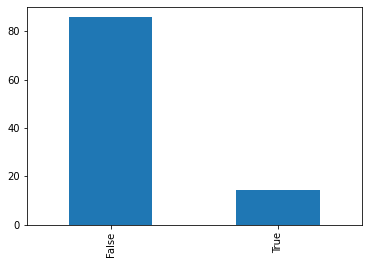

In [20]:
((df['Churn'].value_counts()/len(df['Churn'])) * 100).plot.bar()

In [25]:
dict_churn = {True:1, False:0}
df['Churn Num'] = df['Churn'].map(dict_churn)
df[['Churn Num', 'Churn']][:10]

,Churn Num,Churn
0,0,False
1,1,True
2,1,True
3,0,False
4,0,False
5,0,False
6,0,False
7,1,True
8,0,False
9,0,False


In [21]:
df['State'].value_counts()

AZ    19
NJ    18
WA    18
WV    18
ND    18
NM    18
KS    18
ID    17
RI    17
IN    17
WI    17
TX    17
MS    17
OR    16
KY    16
LA    16
NE    16
VT    16
MI    15
CT    15
NY    15
MT    15
AL    14
MN    14
ME    13
NH    13
IL    13
MA    13
OH    12
TN    12
UT    12
NC    12
MO    12
SD    11
WY    11
SC    11
DE    10
CA    10
MD    10
VA    10
OK     9
FL     9
PA     9
DC     9
HI     9
AK     9
AR     8
CO     7
IA     6
NV     5
GA     5
Name: State, dtype: int64

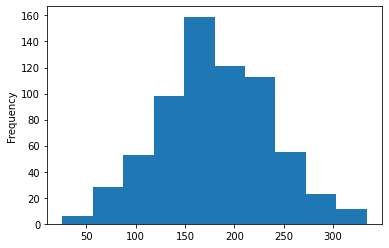

In [16]:
df['Total day minutes'].plot.hist()

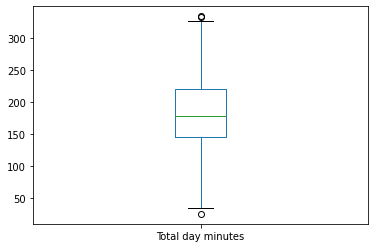

In [17]:
df['Total day minutes'].plot.box()

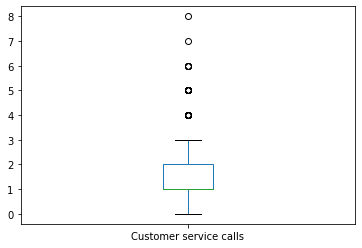

In [18]:
df['Customer service calls'].plot.box()

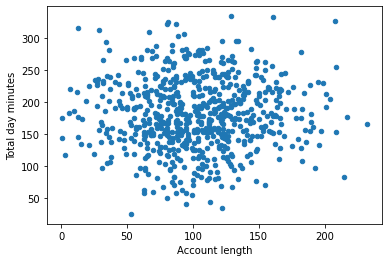

In [28]:
df.plot.scatter('Account length','Total day minutes')

In [29]:
df.corr()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Churn Num
Account length,1.000000,-0.026327,-0.011993,0.017833,0.035703,0.017839,0.027043,0.021237,0.027051,-0.007527,0.027228,-0.007528,0.002362,0.031279,0.002456,-0.027677,0.012315,0.012315
Area code,-0.026327,1.000000,-0.006907,0.051507,-0.008972,0.051492,0.017160,0.017783,0.017182,-0.016832,0.036421,-0.016818,-0.037980,-0.010530,-0.038044,0.000103,0.027129,0.027129
Number vmail messages,-0.011993,-0.006907,1.000000,-0.069172,-0.009952,-0.069187,0.040865,-0.051951,0.040876,0.039751,0.003367,0.039680,0.029949,-0.036847,0.029999,0.007859,-0.102381,-0.102381
Total day minutes,0.017833,0.051507,-0.069172,1.000000,-0.032306,1.000000,0.017987,0.043219,0.017945,-0.031600,0.052761,-0.031603,-0.006725,0.016597,-0.006841,0.029291,0.242781,0.242781
Total day calls,0.035703,-0.008972,-0.009952,-0.032306,1.000000,-0.032319,-0.004688,0.005851,-0.004664,0.079536,-0.030074,0.079529,-0.015319,-0.005155,-0.015201,-0.045953,0.019360,0.019360
Total day charge,0.017839,0.051492,-0.069187,1.000000,-0.032319,1.000000,0.017983,0.043231,0.017941,-0.031613,0.052748,-0.031616,-0.006720,0.016582,-0.006836,0.029290,0.242777,0.242777
Total eve minutes,0.027043,0.017160,0.040865,0.017987,-0.004688,0.017983,1.000000,-0.029077,1.000000,-0.007705,0.001938,-0.007603,-0.027855,0.002929,-0.027887,-0.012213,0.175614,0.175614
Total eve calls,0.021237,0.017783,-0.051951,0.043219,0.005851,0.043231,-0.029077,1.000000,-0.029089,-0.009856,0.036068,-0.009833,-0.001050,0.074829,-0.001152,0.008126,0.055669,0.055669
Total eve charge,0.027051,0.017182,0.040876,0.017945,-0.004664,0.017941,1.000000,-0.029089,1.000000,-0.007691,0.001939,-0.007589,-0.027863,0.002894,-0.027895,-0.012212,0.175616,0.175616
Total night minutes,-0.007527,-0.016832,0.039751,-0.031600,0.079536,-0.031613,-0.007705,-0.009856,-0.007691,1.000000,0.005209,0.999999,-0.041969,-0.057212,-0.042221,-0.067602,0.042930,0.042930


In [30]:
df['Churn'].corr(df['Total day minutes'])

0.24278090380963452

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


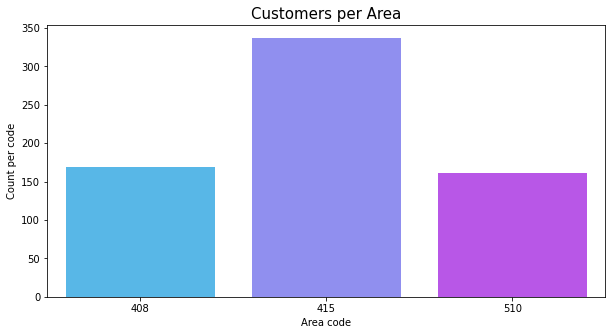

In [39]:

plt.rcParams["figure.figsize"] = (10,5)
sns.countplot(df["Area code"],palette = 'cool')
plt.title("Customers per Area",fontsize=15)
plt.xlabel("Area code",fontsize=10)
plt.ylabel("Count per code",fontsize=10)
plt.show()

In [40]:
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
Churn Num                 0
dtype: int64

In [ ]:
#drop rows with missing values
df.dropna()

In [42]:
#get only rows which have 'Total day calls' populated
df_day_calls = df[df['Total day calls'].notna()]
df_day_calls.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Churn Num
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False,0
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True,1
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True,1
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False,0
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False,0


In [ ]:
df['Total day calls'].fillna(0)
df[:5]
df['Total day calls'].fillna(df['Total day calls'].mean())

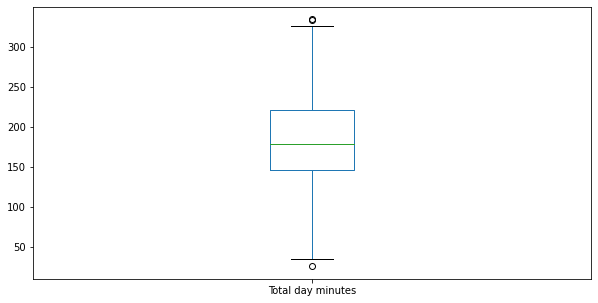

In [44]:
df['Total day minutes'].plot.box()

In [50]:
#remove outliers
df_no_outliers_dmin = df[(df['Total day minutes']<250) & (df['Total day minutes']>100) ]
df_no_outliers_dmin.shape

(547, 21)

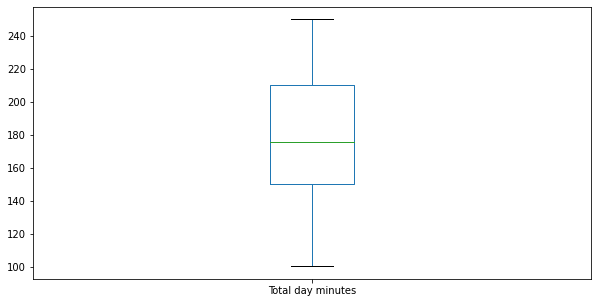

In [51]:
df_no_outliers_dmin['Total day minutes'].plot.box()

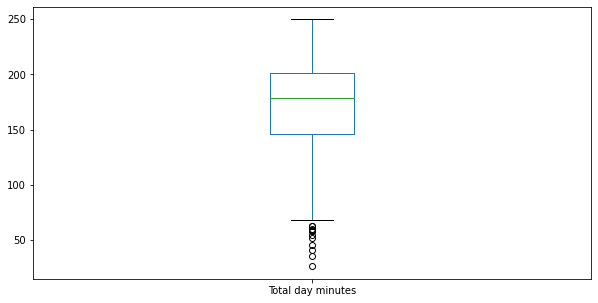

In [58]:
#replace outliers
df_repl_outliers_dmin = df
df_repl_outliers_dmin.loc[df_repl_outliers_dmin['Total day minutes']>250, 'Total day minutes'] = np.mean(df_repl_outliers_dmin['Total day minutes'])
df_repl_outliers_dmin.shape
df_repl_outliers_dmin['Total day minutes'].plot.box()

In [59]:
df[(df['Churn']==0 & (df['Account length']>90))]['Total day charge'].mean()

29.828828671328658

In [60]:
df.apply(np.max)

State                        WY
Account length              232
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         249.9
Total day calls             165
Total day charge          56.83
Total eve minutes         361.8
Total eve calls             168
Total eve charge          30.75
Total night minutes       367.7
Total night calls           175
Total night charge        16.55
Total intl minutes         18.3
Total intl calls             18
Total intl charge          4.94
Customer service calls        8
Churn                      True
Churn Num                     1
dtype: object

In [66]:
df.groupby(['Churn'])['Total day charge','Total night charge'].describe(percentiles=[])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Total day charge                        ... Total night charge             
                 count       mean        std  ...                min   50%    max
Churn                                         ...                                
False            572.0  29.828829   8.589717  ...               1.04  9.03  16.55
True              95.0  36.379053  12.063437  ...               3.26  9.18  14.04

[2 rows x 12 columns]

In [68]:
df.groupby(['International plan'])['Total intl charge', 'Total intl minutes'].agg([np.mean])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Total intl charge,Total intl minutes
,mean,mean
International plan,,
No,2.761824,10.226873
Yes,2.801132,10.371698


In [69]:
df.pivot_table(['Total day charge', 'Total eve charge', 'Total night charge'],
               ['Churn'], aggfunc='mean')

,Total day charge,Total eve charge,Total night charge
Churn,,,
False,29.828829,16.983024,8.946731
True,36.379053,19.105053,9.221789


In [71]:
df.pivot_table(['Total day charge', 'Total eve charge', 'Total night charge'],
               ['Area code'], aggfunc='sum')

,Total day charge,Total eve charge,Total night charge
Area code,,,
408,5040.82,2902.52,1497.33
415,10393.94,5823.93,3062.14
510,5083.34,2802.82,1434.13


In [73]:
df_total = df
df_total['Total calls'] = df_total['Total day calls']+df_total['Total eve calls']+df_total['Total day calls']
df_total.pivot_table(['Total calls'],['Area code'], aggfunc='sum')

,Total calls
Area code,
408,50609
415,102425
510,48634


In [74]:
df_total.groupby('Area code').sum()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Churn Num,Total calls
Area code,,,,,,,,,,,,,,,,,,
408,17901,1267,28002.518141,16797,5040.82,34146.8,17015,2902.52,33273.3,17061,1497.33,1733.8,761,468.26,267,28,28,50609
415,34413,3027,58225.091904,34350,10393.94,68517.3,33725,5823.93,68047.7,33371,3062.14,3477.8,1538,939.18,524,41,41,102425
510,16281,1314,27709.710645,16178,5083.34,32973.9,16278,2802.82,31869.1,16344,1434.13,1617.4,721,436.78,252,26,26,48634


In [75]:
df_total.groupby('Area code')['Account length'].mean()

Area code
408    105.923077
415    102.115727
510    101.124224
Name: Account length, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


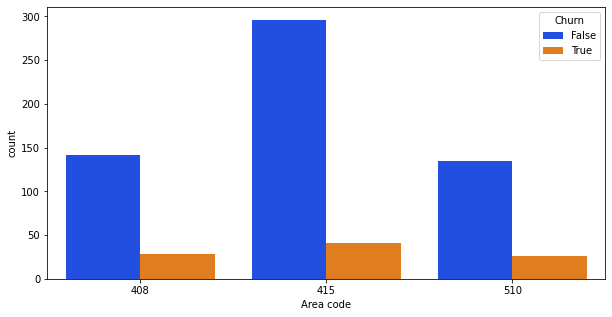

In [80]:
sns.countplot(df['Area code'],hue = df['Churn'],palette = 'bright')

In [85]:
df_retained = df[df['Churn']==False]
df_retained.shape

(572, 22)

In [87]:
df_churned = df.loc[df['Churn']==True]
df_churned.iloc[-1]

State                          CA
Account length                 84
Area code                     415
International plan             No
Voice mail plan                No
Number vmail messages           0
Total day minutes         180.948
Total day calls               113
Total day charge             47.6
Total eve minutes           202.2
Total eve calls                90
Total eve charge            17.19
Total night minutes         156.8
Total night calls             103
Total night charge           7.06
Total intl minutes           10.4
Total intl calls                4
Total intl charge            2.81
Customer service calls          0
Churn                        True
Churn Num                       1
Total calls                   316
Name: 661, dtype: object